Programming Assignment 2
Naïve Bayes Classifier:

                                  Kauhsik Budur
                                  Mymav ID: 1002224112


Approach:
In this task, I aimed to classify emails as spam or not spam using a Gaussian Naive Bayes model. The dataset consisted of emails labeled as spam (1) or not spam (0). The first step involved loading the dataset and exploring its structure using Pandas. Then we check for any missing or Nan Values and handle them.



In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import files
uploaded = files.upload()

dataset = pd.read_csv('dataset_NB.csv')  # Use the name of your uploaded file


# Display the first few rows of the dataset
print(dataset.head())
print(dataset.info())
print(dataset.columns)
num_rows, num_columns = dataset.shape

# Check for missing values
print(dataset.isnull().sum())

print(f'Number of rows: {num_rows}, Number of columns: {num_columns}')

Saving dataset_NB.csv to dataset_NB (4).csv
                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB
None
Index(['email', 'label'], dtype='object')
email    1
label    0
dtype: int64
Number of rows: 3000, Number of columns: 2


In [10]:
# Check for NaN values and handle them
dataset['email'] = dataset['email'].fillna('')

print(dataset.head())
print(dataset.columns)
num_rows, num_columns = dataset.shape
print(f'Number of rows: {num_rows}, Number of columns: {num_columns}')

# Check for missing values
print(dataset.isnull().sum())

                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0
Index(['email', 'label'], dtype='object')
Number of rows: 3000, Number of columns: 2
email    0
label    0
dtype: int64


Preprocessing:
Since the email content is textual, I utilized the TF-IDF (Term Frequency-Inverse Document Frequency) method to convert the text data into numerical features. This technique allows the model to capture the importance of words in the context of the entire dataset. After feature extraction, the dataset was split into training (80%) and testing (20%) sets.

Feature extraction :
TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that assesses the significance of a word in a document relative to a collection of documents, known as a corpus. This method is widely used in text mining and natural language processing (NLP) to transform text data into a numerical format, making it suitable for machine learning models.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the email text data
X = vectorizer.fit_transform(dataset['email'])

# Get the target variable
y = dataset['label']


In [12]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Since GaussianNB expects dense input, we need to convert our sparse matrix to dense
X_train_dense = X_train.toarray()

# Fit the model
gnb.fit(X_train_dense, y_train)


GaussianNB()

In [14]:
# Convert the test data to dense format
X_test_dense = X_test.toarray()

# Make predictions
y_pred = gnb.predict(X_test_dense)


Accuracy: 0.9483333333333334


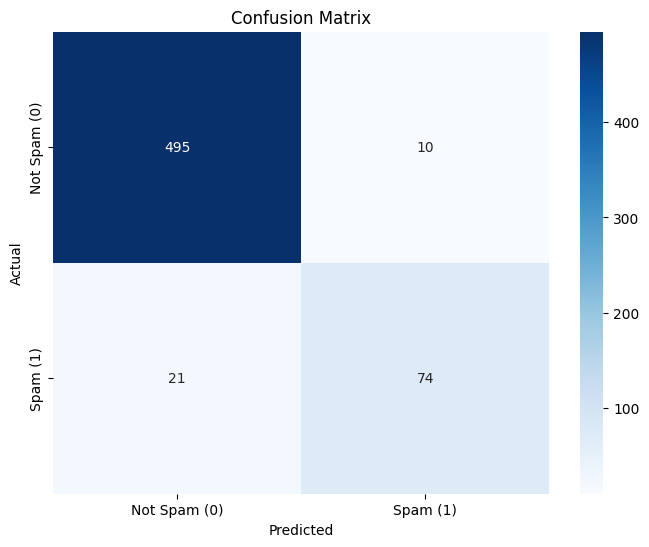

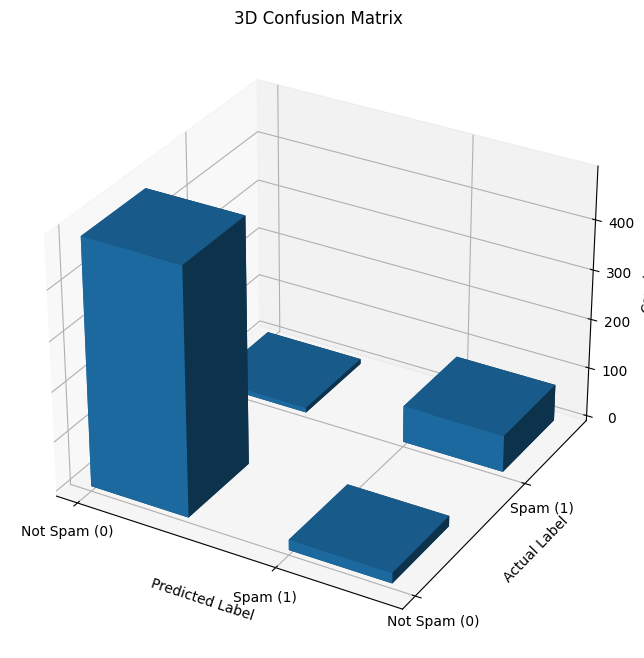

In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam (0)', 'Spam (1)'],
            yticklabels=['Not Spam (0)', 'Spam (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the x and y positions of the bars
x_pos, y_pos = np.meshgrid(np.arange(conf_matrix.shape[0]), np.arange(conf_matrix.shape[1]), indexing="ij")
x_pos = x_pos.flatten()
y_pos = y_pos.flatten()
z_pos = np.zeros_like(x_pos)

# Flatten the confusion matrix
z_size = conf_matrix.flatten()

# Define the size of the bars
dx = dy = 0.5  # Width of the bars
dz = z_size  # Height of the bars (values of the confusion matrix)

# Create a 3D bar chart
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, shade=True)

# Set the labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_zlabel('Counts')
ax.set_title('3D Confusion Matrix')

# Set ticks to represent class labels
ax.set_xticks(np.arange(conf_matrix.shape[0]))
ax.set_xticklabels(['Not Spam (0)', 'Spam (1)'])
ax.set_yticks(np.arange(conf_matrix.shape[1]))
ax.set_yticklabels(['Not Spam (0)', 'Spam (1)'])

plt.show()

Results:
The Gaussian Naive Bayes model was trained on the training data. The model achieved an accuracy score of approximately 94% on the test set. The confusion matrix was plotted to visualize the model's performance, highlighting true positives, true negatives, false positives, and false negatives.
The classifier's ability to handle large feature sets and its efficiency in training contribute significantly to its performance in text classification tasks like spam detection.


Naïve Bayes Classifier

a.	Briefly explain your approach, any preprocessing, explain the output, any visualization for explanation, any feature extraction, in same colab file (3-4 paragraphs max)


Report

Approach:
In this task, I aimed to classify emails as spam or not spam using a Gaussian Naive Bayes model. The dataset consisted of emails labeled as spam (1) or not spam (0). The first step involved loading the dataset and exploring its structure using Pandas.

Preprocessing: Since the email content is textual, I utilized the TF-IDF (Term Frequency-Inverse Document Frequency) method to convert the text data into numerical features. This technique allows the model to capture the importance of words in the context of the entire dataset. After feature extraction, the dataset was split into training (80%) and testing (20%) sets.

Feature extraction : TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that assesses the significance of a word in a document relative to a collection of documents, known as a corpus. This method is widely used in text mining and natural language processing (NLP) to transform text data into a numerical format, making it suitable for machine learning models

Also we can see from confusion matrix that most of the mails are marked as not spam followed by spam emails whic also gives us relatively more accuracy of about 94% for our Naives Bayes classifier.

Results:
The Gaussian Naive Bayes model was trained on the training data. The model achieved an accuracy score of approximately 94% on the test set. The confusion matrix was plotted to visualize the model's performance, highlighting true positives, true negatives, false positives, and false negatives.
The classifier's ability to handle large feature sets and its efficiency in training contribute significantly to its performance in text classification tasks like spam detection.
